# Hypothesis Generation

for a problem statement as understanding the sales of products in stores and working on increasing them, we first need to understand the properties of products and stores and what may increase the sales of such products

*Product Properties*
1. **Offers** : products with offers should have higher sales
2. **Price** : products with lower prices should have higher sales
3. **Healthiness** : products that are a healthy alternative should have higher sales
4. **Quality** : products of high quality for price should have higher sales
5. **Well-known brands** : products of reputable brands should have higher sales
6. **Freshness**: fresh products should have higher sales
7. **Usage** : daily used products should have higher sales
8. **Placement** : products that are placed at eye-level and visible should have higher sales

*Store Properties*
1. **Store Area**: stores of larger area allow for more customers and thus, more sales
2. **Store Location**: stores located in a populated area should have more sales
3. **Staff** : stores with higher number of staff for assistance and marketing should have more sales

# Loading Packages and Data

In [400]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.preprocessing import PolynomialFeatures

import pickle

In [324]:
train = pd.read_csv('BigMartSales\Train.csv')
test = pd.read_csv('BigMartSales\Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [325]:
train.shape

(8523, 12)

In [326]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [327]:
test.shape

(5681, 11)

# Data Structure and Content

### Columns Identification
* **Item_Identifier**: product ID
* **Item_Weight** : weight of product
* **Item_Fat_Content** : Whether the product is low fat or not
* **item_Visibility** : The % of the total display area of all products in a store allocated to the particular product
* **Item_Type** : The category to which the product belongs
* **Item_MRP** : Maximum Retail Price (list price) of the product
* **Outlet_Identifier** : Store ID
* **Outlet_Establishment_Year** : The year in which the store was established
* **Outlet_Size** : The size of the store in terms of ground area covered
* **Outlet_Location_Type** : The type of city in which the store is located
* **Outlet_Type** :  Whether the outlet is just a grocery store or some sort of supermarket
* **Item_Outlet_Sales** : Sales of the product in a particular store.

In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The dataset contains 8523 observations with 12 features classified as 7 categorical features and 5 numerical features
Our target variable is **Item_Outlet_Sales** and it is a continuous one so it is a so it is a **Regression Supervised Machine Learning Problem**

We will concatenate the train and test data into one dataframe to perform our analysis on the whole dataframe

In [329]:
df = pd.concat([train, test])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


making sure that the two dataframes are concatenated:

In [330]:
df.shape

(14204, 12)

In [331]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Exploratory Data Analysis (EDA)

## Univariate Analysis

#### Numerical Attributes

In [332]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


as shown above, we can conclude that:
* For the product prices: the minimum price for a product is 31.29 and maximum is 266.888 and the mean is 141
* For the stores: the oldest store was established in 1985 and newest one in 2009. 
* The average outlet sales is about 2181.28 with minimum of 33.29 and maximum of 13086.96 

* the minimum value for **Item_Visibility** is zero which makes no sense
* it is better if we replaced **Outlet_Establishment_Year** with **Outlet_Age**

In [333]:
new_col = 2013 - df['Outlet_Establishment_Year']
df.insert(loc = 7, column = 'Outlet_Age', value = new_col)
df.drop('Outlet_Establishment_Year', axis = 1, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [334]:
df['Outlet_Age'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Age, dtype: int64

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           11765 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_Type             14204 non-null  object 
 5   Item_MRP              14204 non-null  float64
 6   Outlet_Identifier     14204 non-null  object 
 7   Outlet_Age            14204 non-null  int64  
 8   Outlet_Size           10188 non-null  object 
 9   Outlet_Location_Type  14204 non-null  object 
 10  Outlet_Type           14204 non-null  object 
 11  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


### Visualization

In [336]:
def boxplot_num(df, num_feat):
  fig = plt.figure(figsize=(12, 10))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[feat])

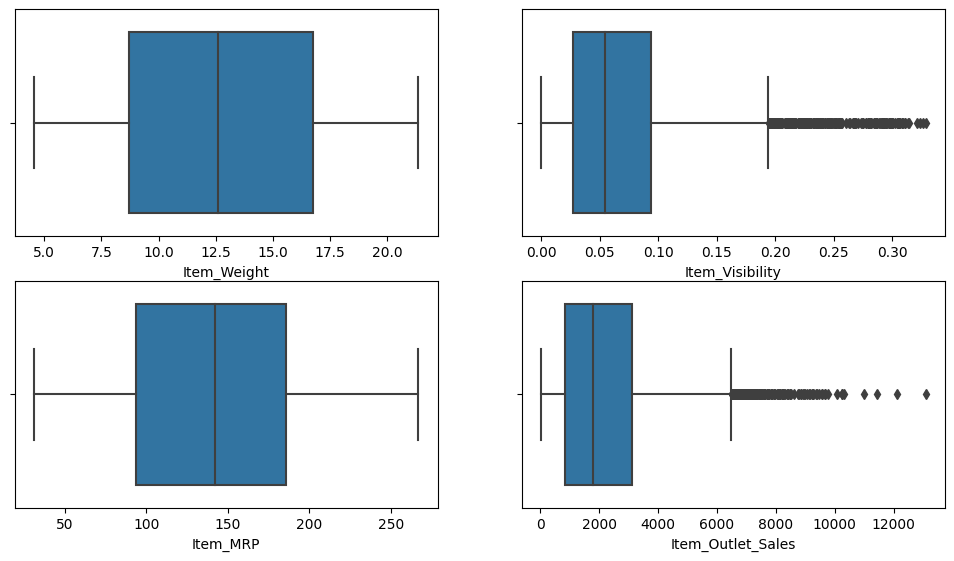

In [337]:
numerical_features = ['Item_Weight'	,'Item_Visibility',	'Item_MRP','Item_Outlet_Sales']
boxplot_num(df, numerical_features)

There are some outliers in **Item_Visibility** and **Item_Outlet_Sales** that we will deal with later on in feature engineering

In [338]:
def histplot_num(df, num_feat):
  fig = plt.figure(figsize=(14, 12))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    plt.title(feat)
    plt.hist(x=df[feat])

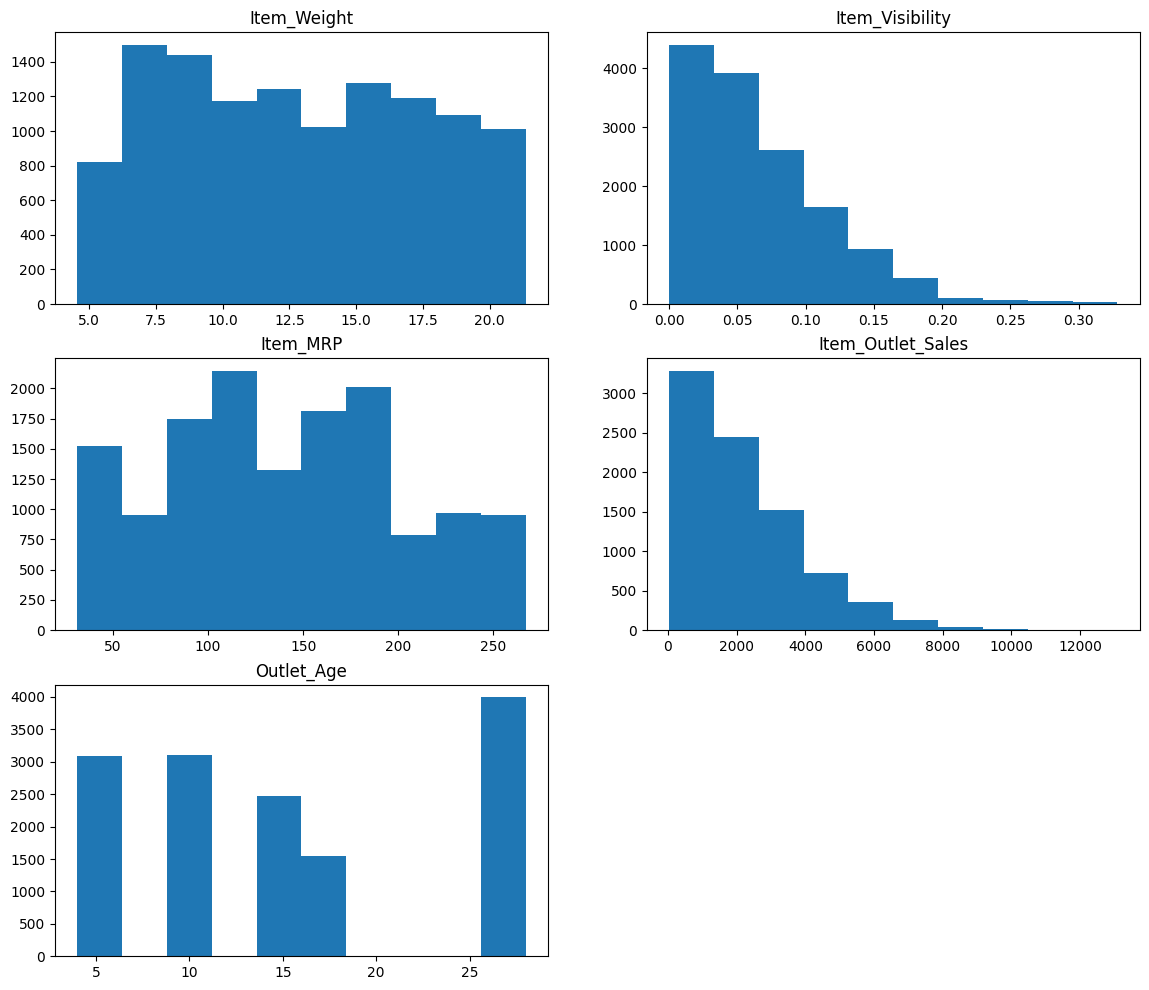

In [339]:
histplot_num(df, numerical_features + ['Outlet_Age'])

In [340]:
def densplot_num(df, num_feat):
  fig = plt.figure(figsize=(15, 14))
  for i, feat in enumerate(num_feat):
    ax = plt.subplot(3, 2, i+1)
    sns.kdeplot(df[feat], fill=True)

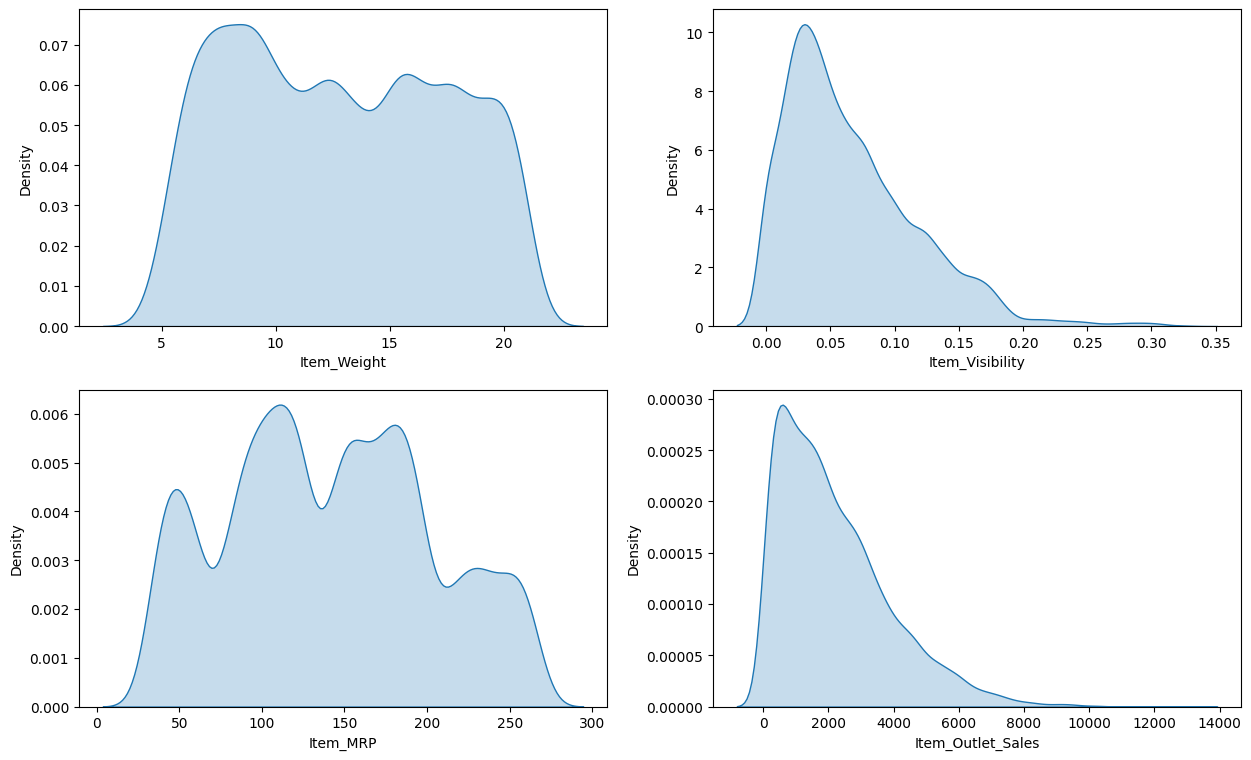

In [341]:
densplot_num(df, numerical_features)

we realize that:
* most stores are between 26 and 28 years old
* **Item_Visibility** and **Item_Outlet_Sales** both have right-skewed distributions

#### Categorical Attributes

In [342]:
cat_features = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type' ,'Outlet_Identifier',
                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for feat in cat_features[1:]:
  print(f'\nFrequency of Category {feat} :')
  print('\n'," "*2, 'Number of Categories: ', len(df[feat].value_counts()), '\n')
  print(df[feat].value_counts())


Frequency of Category Item_Fat_Content :

    Number of Categories:  5 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Category Item_Type :

    Number of Categories:  16 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Category Outlet_Identifier :

    Number of Categories:  10 

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name:

* Simplifying items' categories into 3 only 

In [343]:
new_col = df['Item_Identifier'].apply(lambda x: ' '.join(y[:2] for y in x.split()))
new_col = new_col.replace(['FD', 'DR', 'NC'], ['Food', 'Drinks', 'Non-Consumables'])
new_col.unique()

array(['Food', 'Drinks', 'Non-Consumables'], dtype=object)

In [344]:
df.insert(loc = 4, column = 'Item_Category', value = new_col)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Category,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Non-Consumables,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


* there are some repeated values in **Item_Fat_Content** , we should replace them for more accurate analysis

* for the non-consumables, we will replace fat content value for "Non-edible"

In [345]:
df.loc[df['Item_Category']=='Non-Consumables','Item_Fat_Content']='Non-Edible'

In [346]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'],
                                                        ['Low Fat', 'Low Fat', 'Regular'])

df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Visualization

In [347]:
def cat_plot(df, features):
  for i, feat in enumerate(features[1:], 1):
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=feat, palette="winter")
    plt.xticks(rotation=45)

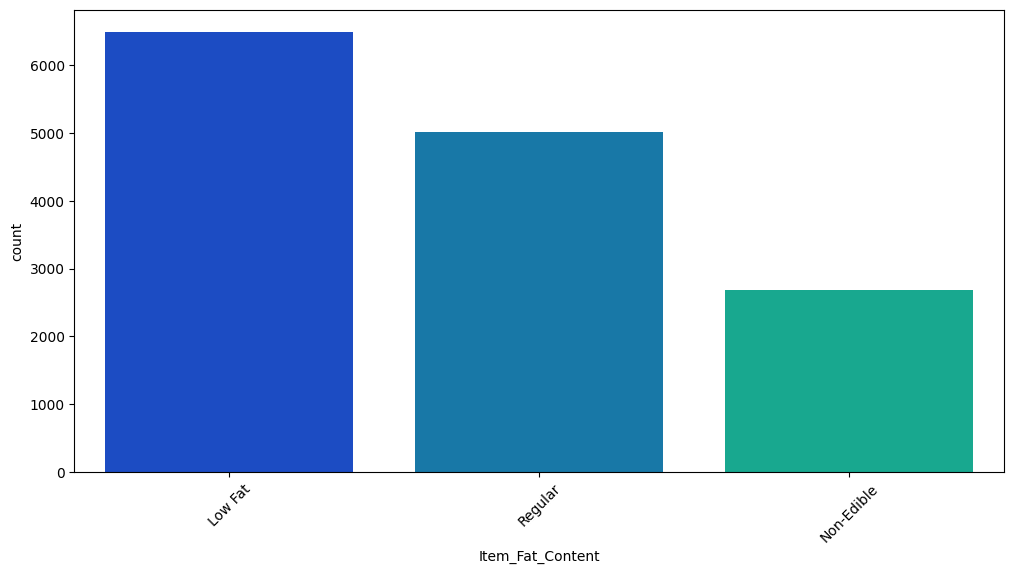

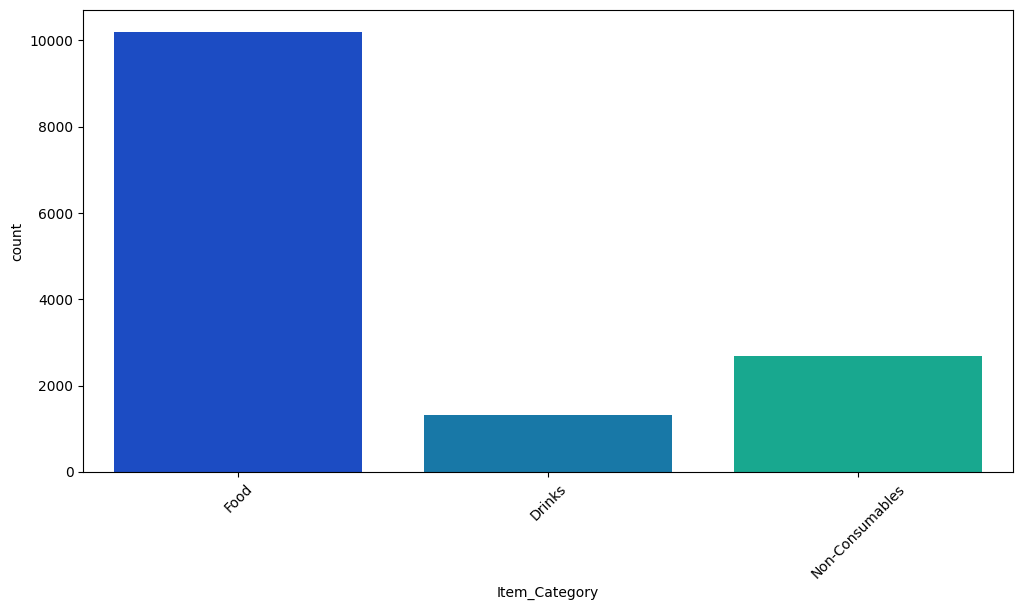

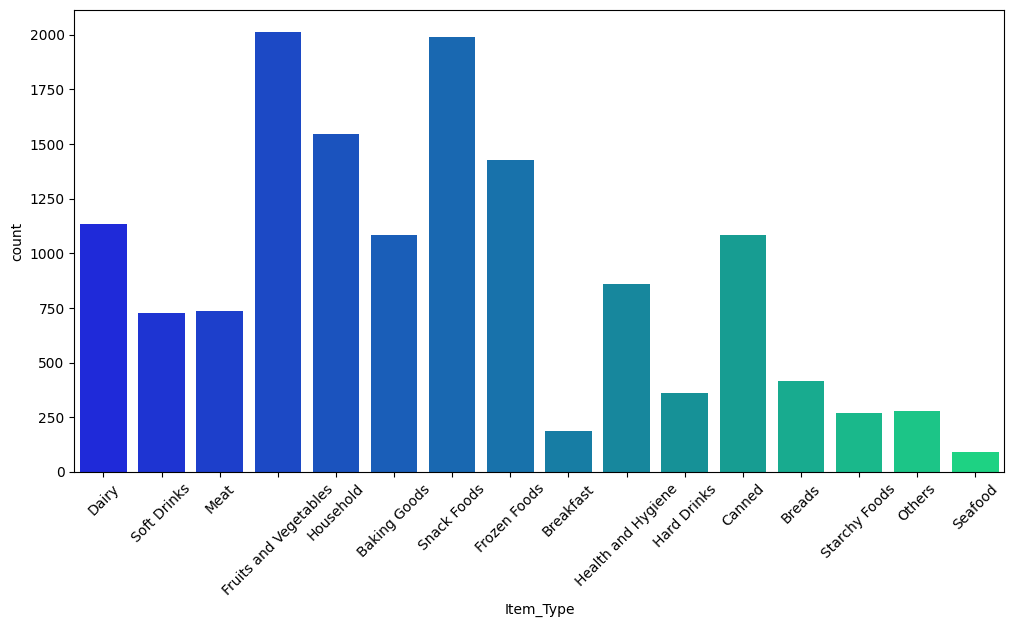

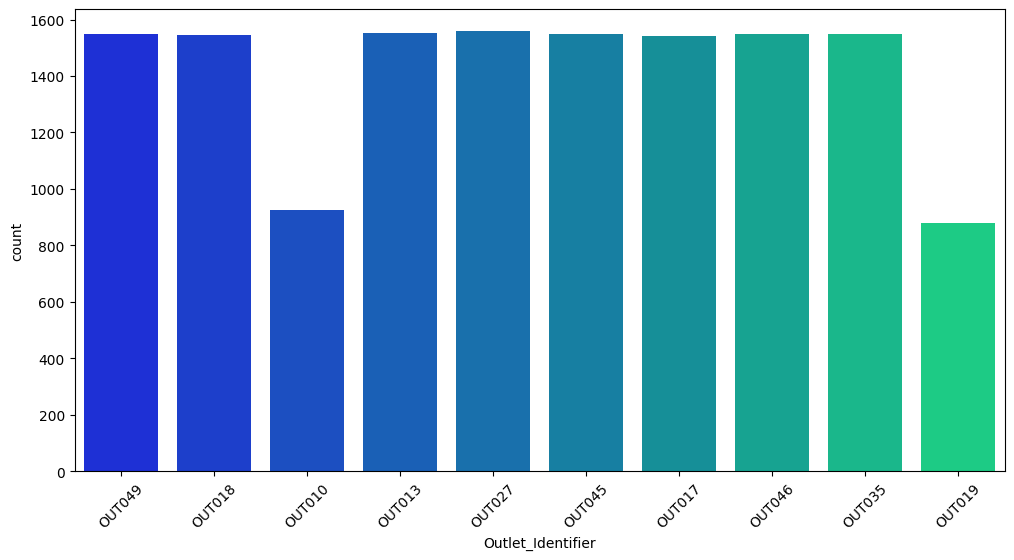

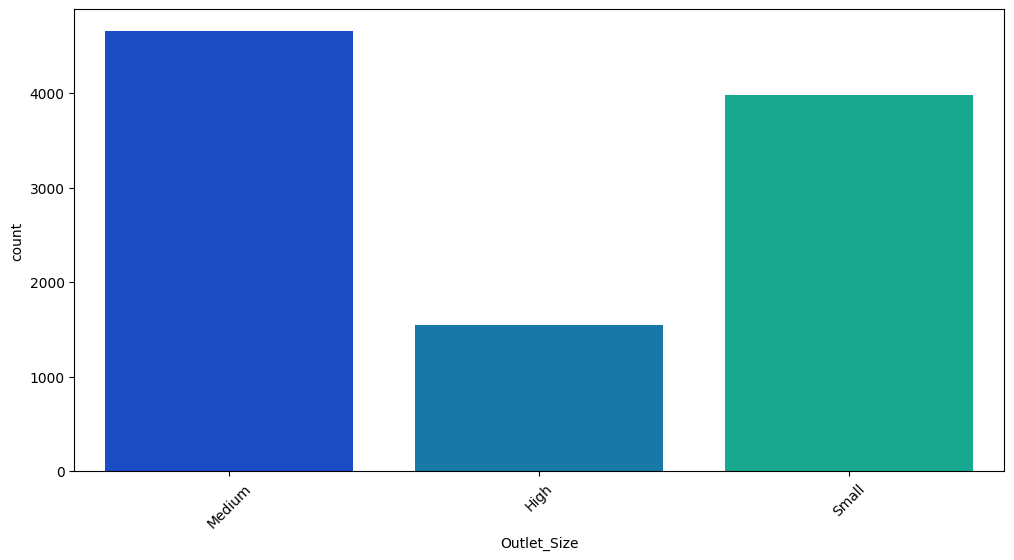

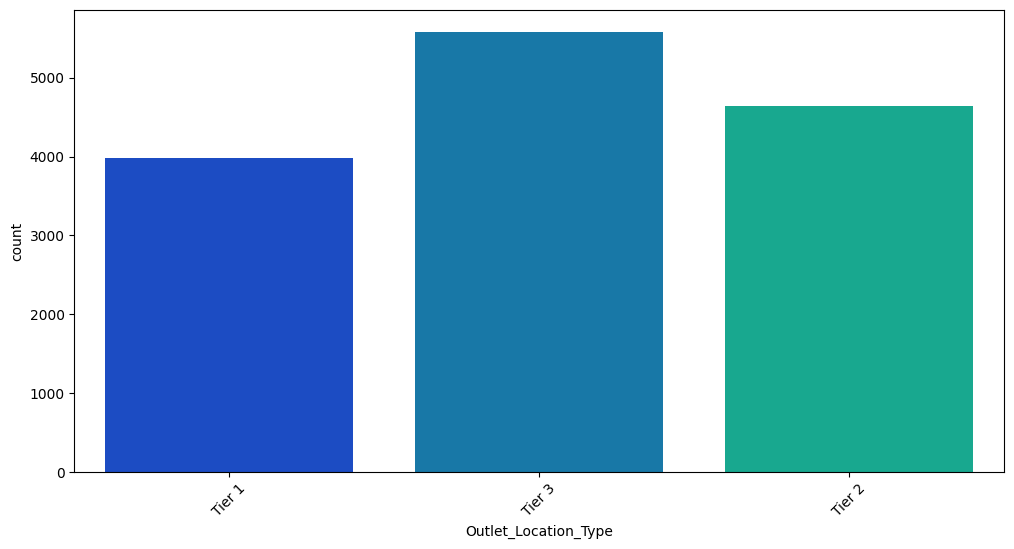

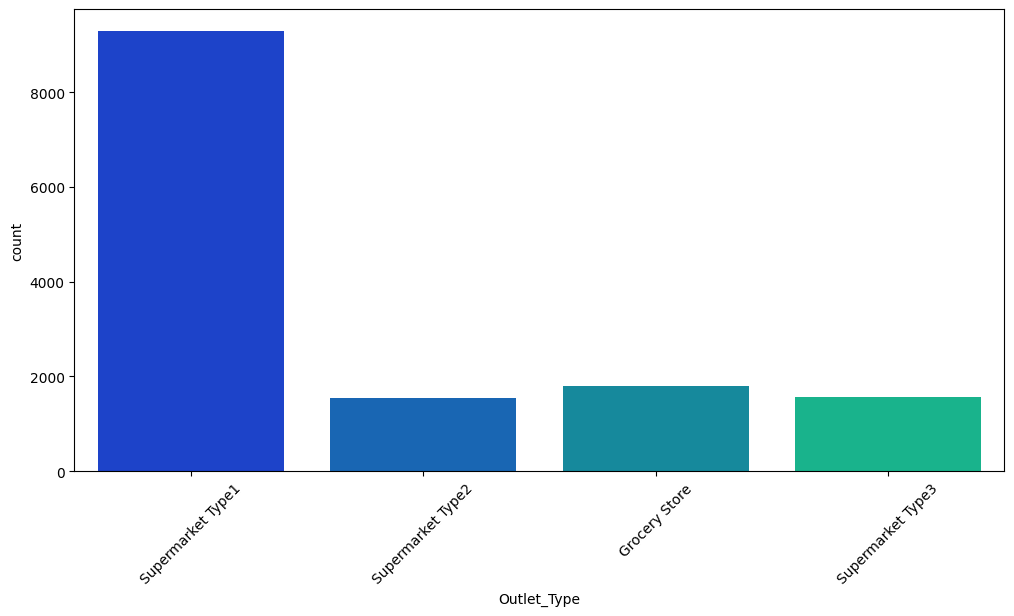

In [348]:
cat_features = ['Item_Identifier', 'Item_Fat_Content','Item_Category' , 'Item_Type' ,'Outlet_Identifier',
                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cat_plot(df, cat_features)

* for **Item_Fat_Content**: most products are *low fat*
* for **Item_Category**: most products are *food*
* for **Item_Type**: most popular products are *fruits & vegetables* and then *snacks*
* for **Outlet_Identifier**: products are fairly distributed among them except for *OUT010* and *OUT019* which have significantly less products
* for **Outlet_Size**: most products are in the *medium-sized* outlets
* for **Outlet_Location_Type**: most popular location type is *Tier 3*
* for **Outlet_Type**: *Supermarket Type1* has drastically larger products

## Bivariate Analysis

#### Continuous - Continuous

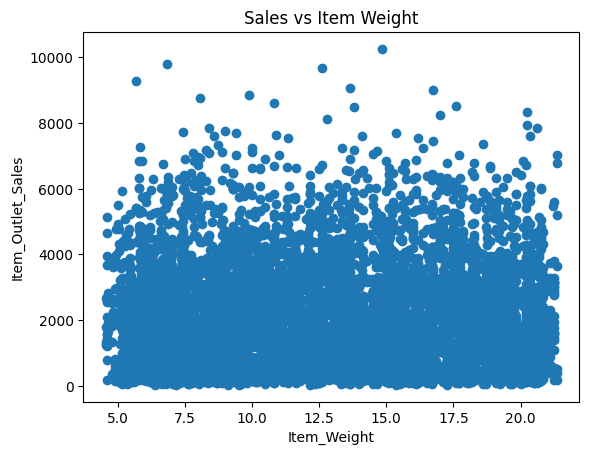

In [349]:
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.title('Sales vs Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

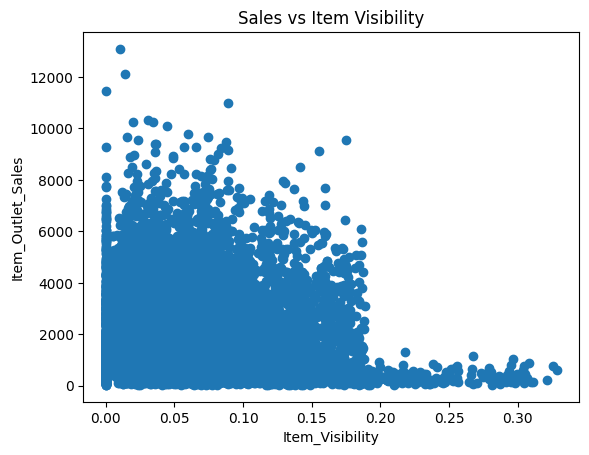

In [350]:
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])
plt.title('Sales vs Item Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

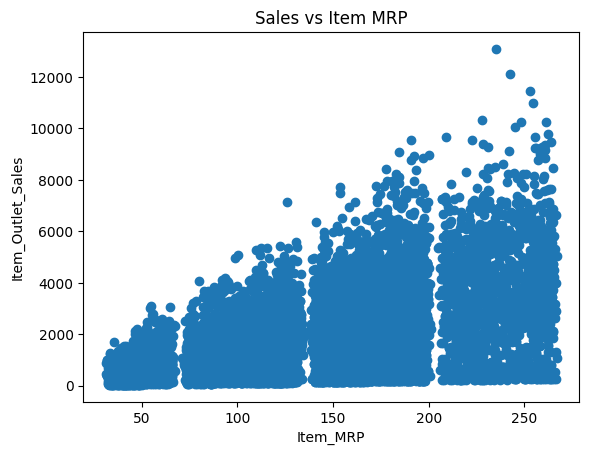

In [351]:
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Sales vs Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* there is no clear relationship between the sales and the **Item-Weight** , the data is randomly spreaded
* according to the graph it appears that there's a negative correlation between sales and **Item_Visibility** which contradicts our hypothesis
* for the **Item_MRP** , there appears that pricy products have higher sales

Correlation Matrix to indicate strength of relationship between continuous variables

In [352]:
matrix = df.corr(numeric_only=True)
matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,-0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,-0.000141,0.567574
Outlet_Age,-0.000645,0.083678,-0.000141,1.000000,0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,0.049135,1.000000


as the correlation matrix shows, the Sales and Item_MRP are moderately positive correlated, while for the Item_Visibility they are low and negatively correlated. For the other attributes, there's no significant relationship between attributes or between attributes and target variable

#### Categorical - Continuous

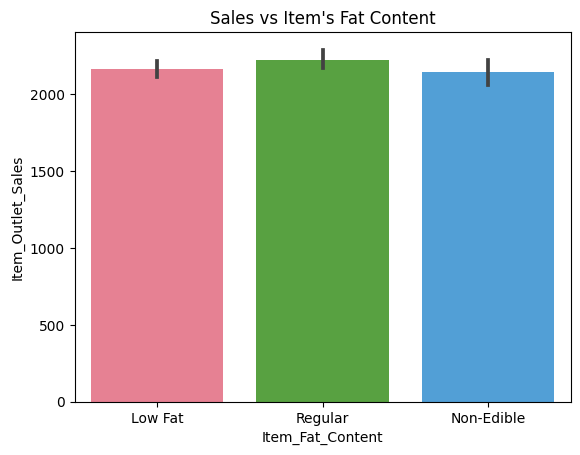

In [353]:
sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Item's Fat Content")
plt.show()

there is no significant difference between sales from low, regular fat or non-edible products

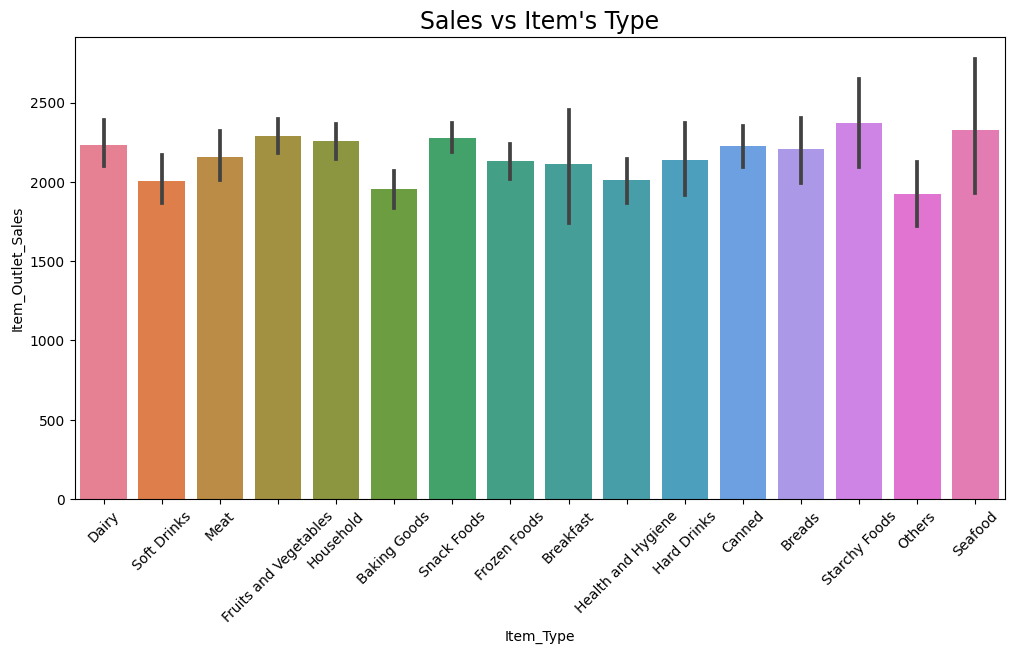

In [354]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Item's Type", fontsize=17)
plt.xticks(rotation=45)
plt.show()

sales are evenly distributed among all types of products

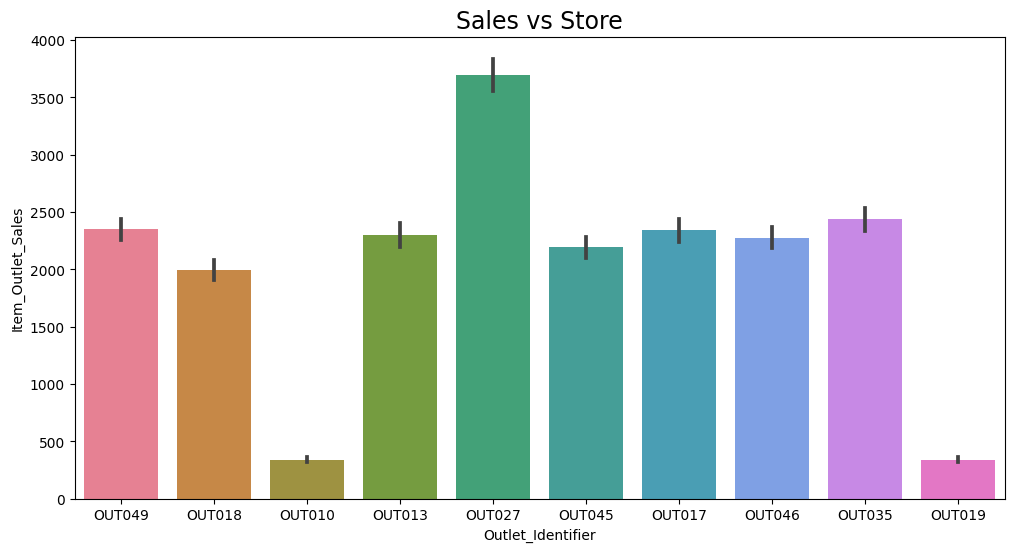

In [355]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store", fontsize=17)
plt.show()

sales are remarkably larger in *OUT027* and very low in *OUT010* and *OUT019* and that is most probably due to the observation that there are way less products in these two stores

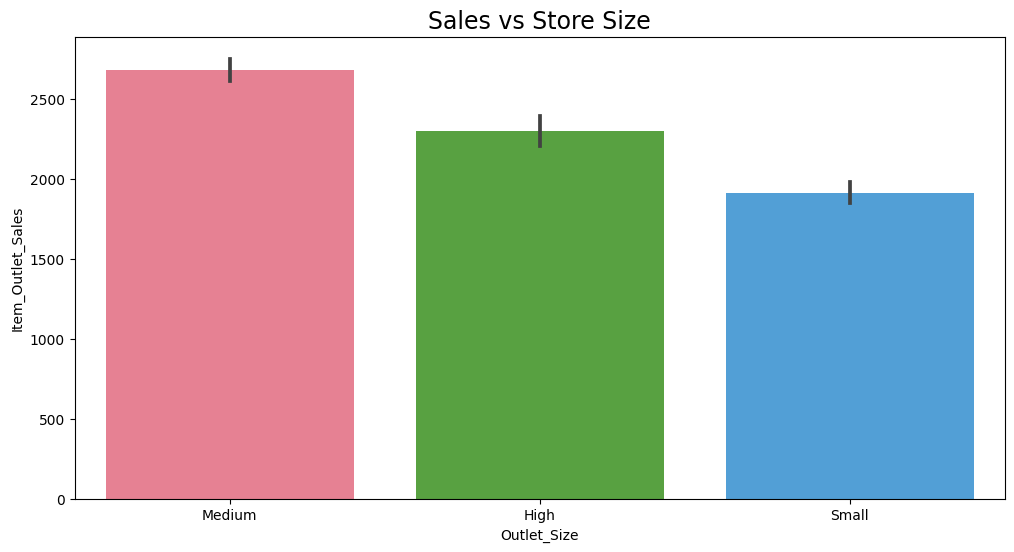

In [356]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Size", fontsize=17)
plt.show()

medium-sized stores have higher sales

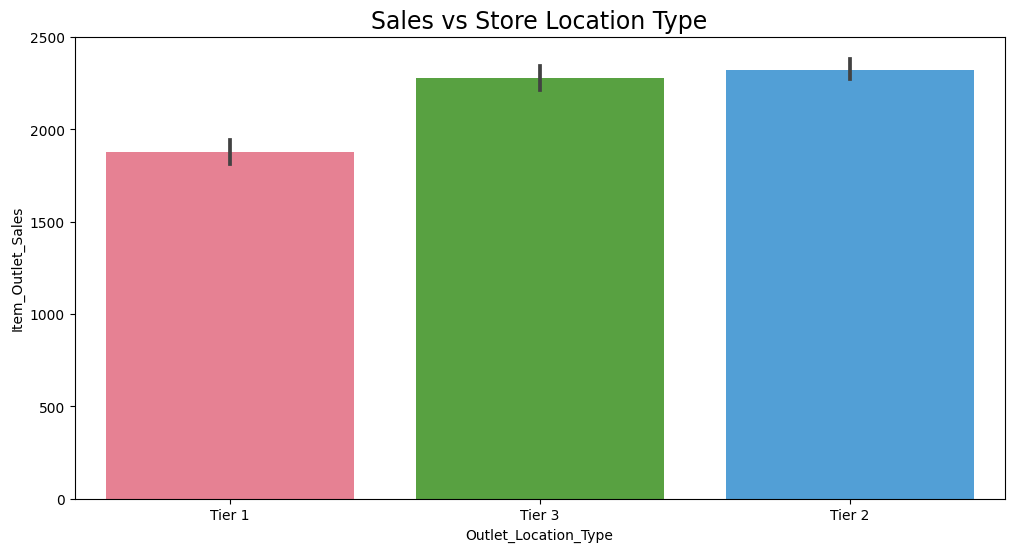

In [357]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Location Type", fontsize=17)
plt.show()

sales in Tier 2 are slightly higher than that of Tier 3

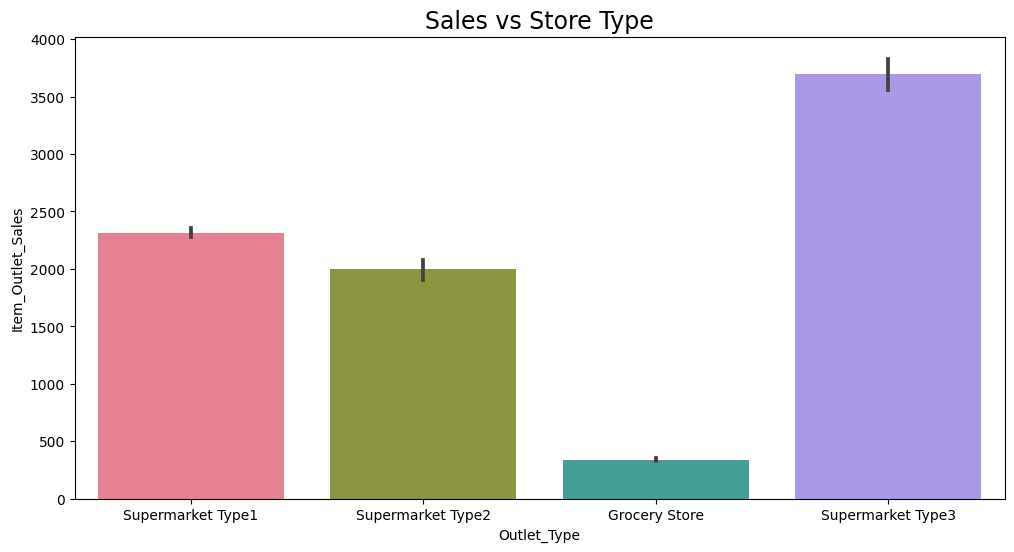

In [358]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', palette='husl')
plt.title("Sales vs Store Type", fontsize=17)
plt.show()

grocery stores have very low sales while supermarket type 3 have way higher sales which is unexpected because Supermarket type 1 has a lot more products

## Missing Value Treatment

In [359]:
df.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales       5681
Outlet_Size             4016
Item_Weight             2439
Item_Identifier            0
Item_Fat_Content           0
Item_Visibility            0
Item_Category              0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Age                 0
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

the missing values in *Item_Outlet_Sales* are due to the test data , so we will leave them as they are, we are going to deal with missing values in *Outlet_Size* and *Item_Weight*

For *Outlet_Size*: we are going to perform Mode Imputation for similar cases since it is a categorical variable

In [360]:
df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [361]:
df['Outlet_Size'] = df.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(pd.Series.mode(self=x)[0]))

In [362]:
#checking if the missing values are filled or not
df['Outlet_Size'].isnull().sum()

0

for *Item_Weight*: Mean Imputation for similar cases since it is a numeric variable

In [363]:
df.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.mean)

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [364]:
df['Item_Weight'] = df.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(pd.Series.mean(self=x)))

In [365]:
#checking if the missing values are filled or not
df['Item_Weight'].isnull().sum()

0

In [366]:
df.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales       5681
Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Category              0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Age                 0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

## Feature Engineering

### Removing Outliers

In [367]:
def outliers(df, feat):
  Q1 = df[feat].quantile(0.25)
  Q3 = df[feat].quantile(0.75)
  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  return upper_bound, lower_bound

In [368]:
upper, lower = outliers(df, 'Item_Visibility')
df = df[(df['Item_Visibility'] > lower) & (df['Item_Visibility'] < upper)]

In [369]:
train_data = df[:8523]
upper, lower = outliers(train_data, 'Item_Outlet_Sales')
train_data = train_data[(train_data['Item_Outlet_Sales'] > lower) & (train_data['Item_Outlet_Sales'] < upper)]
s = train_data.shape[0]
df[:s] = train_data

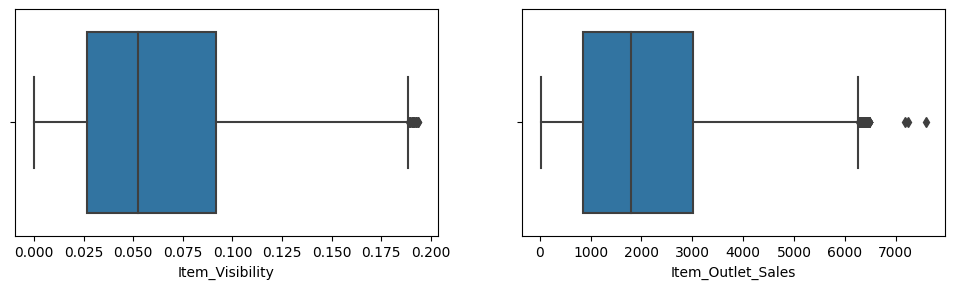

In [370]:
boxplot_num(df, ['Item_Visibility', 'Item_Outlet_Sales'])

### Encoding Categorical Variables

In [371]:
# label encoding for Ordinal Data Variables: 'Item_Fat_Content', 'Outlet_Size', 
#'Outlet_Location_Type', 'Outlet_Type'
le = LabelEncoder()
ordinal = ['Item_Fat_Content' ,'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for feat in ordinal:
  df[feat] = le.fit_transform(df[feat])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Category,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Food,Dairy,249.8092,OUT049,14,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,Drinks,Soft Drinks,48.2692,OUT018,4,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Food,Meat,141.6180,OUT049,14,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,Food,Fruits and Vegetables,182.0950,OUT010,15,2,2,0,732.3800
4,NCD19,8.93,1,0.000000,Non-Consumables,Household,53.8614,OUT013,26,0,2,1,994.7052


In [372]:
# One Hot Encoding for Nominal Data

df = pd.get_dummies(df, columns=['Item_Category',
                                  'Outlet_Identifier'], drop_first=True)

Dropping unnecessary columns :
* instead of working with the items' IDs I will just use their properties
* dropping Item_type because we simplified it into 3 categories only
* dropping Item_Category because we encoded it into 3 separate columns

In [373]:
df.drop(['Item_Identifier', 'Item_Type'], axis=1, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category_Food,Item_Category_Non-Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,14,1,0,1,3735.1380,1,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,4,1,2,2,443.4228,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,14,1,0,1,2097.2700,1,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,15,2,2,0,732.3800,1,0,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,26,0,2,1,994.7052,0,1,1,0,0,0,0,0,0,0,0


## Preprocessing Data

In [374]:
train = df[:s]
test = df[s:]

In [375]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category_Food,Item_Category_Non-Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
8333,15.60,0,0.116816,75.5670,26,0,2,1,1684.4740,1,0,1,0,0,0,0,0,0,0,0
8334,13.15,0,0.020699,86.3566,26,0,2,1,1099.2358,1,0,1,0,0,0,0,0,0,0,0
8335,10.60,2,0.033104,48.9008,14,1,0,1,708.4112,1,0,0,0,0,0,0,0,0,0,1
8336,11.10,2,0.090009,164.0526,15,2,2,0,164.4526,1,0,0,0,0,0,0,0,0,0,0
8337,11.30,1,0.116750,195.2478,28,2,0,0,193.7478,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,2,0.013496,141.3154,16,2,0,1,NaN,1,0,0,0,0,0,0,0,0,1,0
5677,7.60,2,0.142991,169.1448,4,1,2,2,NaN,1,0,0,0,1,0,0,0,0,0,0
5678,10.00,1,0.073529,118.7440,11,2,1,1,NaN,0,1,0,0,0,0,0,0,1,0,0
5679,15.30,2,0.000000,214.6218,6,2,1,1,NaN,1,0,0,1,0,0,0,0,0,0,0


In [376]:
df.shape

(13943, 20)

In [377]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category_Food,Item_Category_Non-Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,14,1,0,1,3735.1380,1,0,0,0,0,0,0,0,0,0,1
1,5.920,2,0.019278,48.2692,4,1,2,2,443.4228,0,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,14,1,0,1,2097.2700,1,0,0,0,0,0,0,0,0,0,1
3,19.200,2,0.000000,182.0950,15,2,2,0,732.3800,1,0,0,0,0,0,0,0,0,0,0
4,8.930,1,0.000000,53.8614,26,0,2,1,994.7052,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8328,6.865,0,0.056783,214.5218,26,0,2,1,2778.3834,1,0,1,0,0,0,0,0,0,0,0
8329,8.380,2,0.046982,108.1570,11,2,1,1,549.2850,1,0,0,0,0,0,0,0,1,0,0
8330,10.600,1,0.035186,85.1224,9,2,1,1,1193.1136,0,1,0,0,0,0,0,1,0,0,0
8331,7.210,2,0.145221,103.1332,4,1,2,2,1845.5976,1,0,0,0,1,0,0,0,0,0,0


In [378]:
test = test.drop('Item_Outlet_Sales', axis=1)
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category_Food,Item_Category_Non-Consumables,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
8333,15.60,0,0.116816,75.5670,26,0,2,1,1,0,1,0,0,0,0,0,0,0,0
8334,13.15,0,0.020699,86.3566,26,0,2,1,1,0,1,0,0,0,0,0,0,0,0
8335,10.60,2,0.033104,48.9008,14,1,0,1,1,0,0,0,0,0,0,0,0,0,1
8336,11.10,2,0.090009,164.0526,15,2,2,0,1,0,0,0,0,0,0,0,0,0,0
8337,11.30,1,0.116750,195.2478,28,2,0,0,0,1,0,0,0,1,0,0,0,0,0


In [379]:
test.shape

(5754, 19)

In [380]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### Modelling

#### Linear Regression

In [382]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [383]:
y_pred = lin_reg.predict(X_test)

In [384]:
print('Training score  : {}'.format(lin_reg.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg.score(X_test, y_test)))

Training score  : 0.5487273062419499
Test score      : 0.5559545835992048


In [385]:
lin_reg_mse  = MSE(y_test , y_pred)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = R2(y_test, y_pred)

print('RMSE  \t    : {}'.format(lin_reg_rmse))
print('R2 Score    : {}'.format(lin_reg_r2))

RMSE  	    : 984.0761055793971
R2 Score    : 0.5559545835992048


Standardizing our data

In [386]:
steps = [
    ('scaler', StandardScaler()),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, y_train)

print('Training score  : {}'.format(lin_reg_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_pipeline.score(X_test, y_test)))

Training score  : 0.5486058563971553
Test score      : 0.5557391526854595


there is no big difference between accuracies before and after standardizing

#### Regularized Linear Regression

##### Ridge

In [387]:
steps = [
            ('scaler', StandardScaler()),
            ('model' , Ridge(alpha=5, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training Score  : {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, y_test)))

Training Score  : 0.5487265677569548
Test Score      : 0.5559669041710233


We will add some polynomial features to see if it will increase model performance

In [388]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=5, fit_intercept=True))
        ]

pridge_pipeline = Pipeline(steps)

pridge_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(pridge_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(pridge_pipeline.score(X_test, y_test)))

Training score  : 0.588570529441184
Test score      : 0.5793527758467348


polynomial features did affect model performance

##### Lasso

In [389]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=1, fit_intercept=True, max_iter=10000))
        ]

lasso_pipeline = Pipeline(steps)

lasso_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(lasso_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(lasso_pipeline.score(X_test, y_test)))

Training score  : 0.5885091994250102
Test score      : 0.580583416026965


##### ElasticNet

In [390]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
        ]

en_pipeline = Pipeline(steps)

en_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(en_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(en_pipeline.score(X_test, y_test)))

Training score  : 0.5873548028127791
Test score      : 0.579225335900724


In [391]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [392]:
y_pred_rf = rf_regressor.predict(X_test)
print('Training score  : {}'    .format(rf_regressor.score(X_train, y_train)))
print('Test score      : {}'    .format(rf_regressor.score(X_test, y_test)))

Training score  : 0.9344360876821541
Test score      : 0.5249910913966007


we observe that the random forest model overfits the data wso we will do some hyperparameter tuning

In [393]:
rf_regressor_ = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, random_state = 20)
rf_regressor_.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      random_state=20)

In [394]:
print('Training score  : {}'    .format(rf_regressor_.score(X_train, y_train)))
print('Test score      : {}'    .format(rf_regressor_.score(X_test, y_test)))

Training score  : 0.5841653889049867
Test score      : 0.5765061157946804


#### XGBoost Regressor

In [395]:
! pip install xgboost

In [396]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_predict_xgb = xgb_model.predict(X_test)

In [397]:
print('Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('Test score      : {}'.format(xgb_model.score(X_test, y_test)))

Training score  : 0.8409159179718568
Test score      : 0.500925597266741


this model also overfits the data

In [398]:
xgb_mse  = MSE(y_test , y_predict_xgb)
xgb_rmse = math.sqrt(lin_reg_mse)
xgb_r2   = R2(y_test, y_predict_xgb)

print('RMSE  \t    : {}'.format(xgb_rmse))
print('R2 Score    : {}'.format(xgb_r2))

RMSE  	    : 984.0761055793971
R2 Score    : 0.500925597266741


best model is the lasso one , saving this model

In [401]:
with open("BigMart_Sales_Model.pkl", "wb") as file:
    pickle.dump(lasso_pipeline, file)